<a href="https://colab.research.google.com/github/ekaminuma/MDDSC2018/blob/master/MDDSC_A1803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#実験用マウス系統の画像分類モデル
### モデリング賞応募用の定型プログラム




神沼英里(東京医科歯科大学 医療データ科学推進室)　

2019年1月6日版


-----

＜概要＞

この[Google Colab](https://www.codexa.net/how-to-use-google-colaboratory/)プログラムコードは、第1回MD-DSC機械学習モデル、モデリング賞応募用の定型プログラムです。本定型プログラムは、実験用マウスlaboratory mice(_Mus musculus_)の代表的な下記2系統を、画像で分類する機械学習モデルを構築します。

| 分類番号 | 画像分類ラベル(系統名) | wikipediaより画像引用 |
|:-----------|------------:|:------------:|
| ① | C57BL/6  (省略形：B6) | <img src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Black_6_mouse_eating.jpg"  width=" 150" />  |
| ② | BALB/c (省略形：BALB) |  <img src="https://upload.wikimedia.org/wikipedia/commons/7/77/Lightmatter_lab_mice.jpg"  width="150"  />|


各マウス系統の詳細は、wikipediaの[実験用マウス](https://en.wikipedia.org/wiki/Laboratory_mouse)を参照して下さい。この定型プログラムを基盤として「画像分類ラベル」を修正する事で、オリジナルの画像分類モデルを構築する事が出来ます。分類ラベルを変更する事で、新規の機械学習モデルを構築可能です。実行時にエラーが出る場合は、d-drive@ml.tmd.ac.jpまで連絡して下さい。

-----
-----

＜モデリング賞の応募の流れ＞

- [1]本定型コードをtest1.ipynb等の<font color="red">別名で保存</font>(注1)。<font color="red">ランタイムをGPUに変更</font>(注2)して、全コードセルを実行してみる。
- [2]自分で考えた<font color="red">オリジナルの「画像分類ラベル」に変更</font>して、オリジナルの画像分類モデルを構築してみる。
- [3] 右上の共有ボタンを押すと、test1.ipynbのURLがコピーされる(コードは共有状態になる)
- [4]A4１枚の紙に、解説（タイトル＋名前＋概要＋考察）を記載してスマホカメラで撮影。
- [5][モデリング賞投稿サイト](https://docs.google.com/forms/d/e/1FAIpQLSefm1sgwOTTGegRL-_sPTXfifPi6KY4Rp_UfQUKSTcIlzG53A/viewform)から、URL(test1.ipynb分)と解説画像を投稿する

--------
＜定型からオリジナルへの変更箇所＞

次4点が、変更作業が必要な個所である。下記の赤文字部分を、定型からオリジナルに修正しよう。目次の３列目にも記載している。

- (1-3: LINE15)	　検索キーワードを変更

　　　　crawler.crawl(keyword="<font color="red">C57BL/6</font>", max_num=50, filters=filters)

- (1-4: LINE15)	　検索キーワードを変更

     crawler.crawl(keyword="<font color="red">BALB/c</font>", max_num=50,filters=filters)

- (2-2-2: LINE8 )  画像削除番号を変更

     list_clean=(<font color="red">37 44 45 46 48 50</font>) 


- (2-2-4: LINE8  )  画像削除番号を変更

    list_clean=(<font color="red">24 30 31 35 36 38 39 41 42 43 44 45 46 47 48 49</font>) 

---------

＜オリジナル構築のTIPS＞

- **削除すべき画像**＝分類ラベルに内容が合致しない画像。また、別クラスの分類ラベルの内容が含まれる画像(B6, BALBの両方が写る画像など)。
- **データ総数N**＝画像を水増ししても、Nの値が小さい場合は、構築モデルの予測精度が下がる。Nが30枚を切る様なら(1-2)に戻り、画像をダウンロードし直そう。
- **検索キーワードの選択**=BALBはicrawlerを実行し直しても、画像ヒット数が増えない。公開されている画像数がB6より少ないからである。オリジナルモデルの分類ラベル(=検索キーワード)を探す時には、検索ヒット数が多い検索キーワードを選択しよう。検索ヒット数は、[画像検索サイト](https://www.google.co.jp/imghp?hl=ja)で見積る事ができる。

-----

＜目次＞

| 　 | 作業ステップ | 変更作業 |
|:-----------|------------:|:------------:|
| <font color="blue">**1**</font> |<font color="blue"> **訓練データの画像収集**</font> ||
| **1-1** | **icrawler install** |  |
| **1-2** | **訓練データ（画像）保存用ディレクトリ作成** |  |
| **1-3** | **icrawlerでB6画像をダウンロード** |  <font color="red">検索キーワード変更</font> |
| **1-4** | **icrawlerでBALB画像をダウンロード** |  <font color="red">検索キーワード変更 |
|<font color="blue">**2**</font> |<font color="blue"> **訓練データの前処理**</font>|
|**2-1** |**画像形式の変換**||
|2-1-1|　画像のファイル名表示 ||
|2-1-2|　 拡張子名でファイル数をカウント ||
|2-1-3|　 画像操作ツール「imagemagick」をインストール ||
|2-1-4|　  拡張子.jpeg/.JPGは、.jpgに名前を変更 ||
|2-1-5|　 gif形式をjpg形式に変換 ||
|2-1-6| 　 png形式をjpg形式に変換||
|2-1-7| 　  拡張子名.jpgのファイル数をカウント ||
|**2-2**| **不要な画像を削除**||
|2-2-1 | 　  im1ディレクトリ中の画像を表示||
|2-2-2 |　   不要画像を消去(im1_cleanに出力)| <font color="red">画像削除番号を変更</font>|
| 2-2-3 |　   im2ディレクトリ中の画像を表示||
 |2-2-4 |　   不要画像を消去(im2_cleanに出力)|<font color="red">画像削除番号を変更</font>|
 |2-2-5| 　  im1_cleanとim2_cleanの画像枚数をカウント||
 |2-2-6|  　     データ数 Nを計算  | |
|**2-3**| **Train/Testディレクトリに画像分配**||
|2-3-1|   　    Train/Testに画像をcopy ||
  |2-3-2|   　    Train/Testの画像数を確認||
 |<font color="blue">**3**</font>| <font color="blue">**画像分類MLモデルの構築と精度評価**</font>||
 |**3-1**| **ImageNet学習済の深層学習モデルで画像分類**||
 |**3-2**| **ImageNet学習済の深層学習モデルを使って転移学習**||
|3-2-1| ImageNet学習済VGG16モデルを読み込み(全結合層以外)||
|3-2-2| 全結合層を新規に作成して追加||
|3-2-3| 画像枚数を水増し、モデルを学習||
|3-2-4|学習過程の可視化||
[3-2-5] 構築モデルの精度評価||

-----
＜注意＞
- 注1: Colabコードを動かす方法は [A1801教材: プログラミング実習のための「Google Colaboratory」の開始方法](https://sites.google.com/site/mddscapx/)を参照。

- 注2: メニュの「ランタイム」から「ランタイムのタイプを変更」をクリック。
ハードウェアのアクセレレータを<font color="red">GPU</font>に変更
![GPU
](https://lh4.googleusercontent.com/ct7Jcnuift-SJ7bE83gNEAFBNxiTORPgV_D_SGZCvtlv6rxgfJ4GOlwJXZnHeaz0FrgJ_tmZy4S5eCHdsJGs=w1588-h991 =250x "GPU" )

- 注3: Colabは無料提供の為、サーバへの接続が下記条件で切断される。切断されたら、再接続ボタンをクリックする。

    -  12時間連続使用で切断
    - ノートブックのセッションが切れた後に90分経過で切断
    - 参考：[Qiita:【はやわかり＋保存版】Google Colabチートシート](https://qiita.com/tomo_makes/items/ec12dd61e4ced0a3dd66)
  
  
  ------
  ------


##(1)訓練データの画像収集

ここでは、画像分類モデルの学習に使う訓練データを用意する。手元に画像データが無いので、pythonライブラリ「[icrawler](https://icrawler.readthedocs.io/en/latest/)」を使い、ウェブの公開画像を収集する。インターネット上の公開画像を機械学習に使う場合は、著作権の有無が問題になる。しかし、モデリング賞は教育目的である為に、[改定著作権法35条「教育の情報化への対応」](https://business.bengo4.com/articles/420)に該当し、著作権有り画像も無許諾で使用可能である。


＜参考＞
- [Qiita:機械学習用の画像を集めるのにicrawlerが便利だった](https://qiita.com/tkt989/items/84c6581dfa1d9a42dc2d)
- [文化庁の改定著作権の解説資料](http://www.bunka.go.jp/seisaku/bunkashingikai/chosakuken/bunkakai/51/pdf/r1406118_08.pdf)
- [改定著作権法 新30条-４(旧第47条-7)の解説](https://storialaw.jp/blog/4936)
- `%%bash`はColabセルで、Linuxコマンドの実行前に記載する。Linuxコマンドに不慣れな場合は、[Linuxコマンド実習教材A1802](https://sites.google.com/site/mddscapx/)を試してみよう。



In [0]:
#(1-1)
# Google Colabに、icrawlerライブラリをpipコマンドでインストールする。
# LinuxコマンドをColabで実行するには、%%bashが必要。
#
# Linuxコマンド(pip)
#
%%bash

pip install icrawler

In [0]:
#(1-2)
# 訓練データの画像保存用ディレクトリ(im1, im2)を作成
#
# Linuxコマンド(mkdir)
#
%%bash

#----前使ったディレクトリが存在すれば、中身も全て削除-------------------
if [ -e im1 ]; then
    rm -r im1
fi
if [ -e im2 ]; then
    rm -r im2
fi

#----新規にディレクトリ作成---------------------
mkdir im1
mkdir im2

--------
直前のコードでは、画像保存用の2つのディレクトリ「im1」と「im2」を作成した。
次に、C57BL/6マウスの画像をim1に、BALB/cマウスの画像をim2にそれぞれ50枚を保存する。もし3種類の画像を分類したい場合は、im3ディレクトリも作成しよう。

| 分類番号 | 画像分類ラベル | 保存ディレクトリ |
|:-----------|------------:|:------------:|
| ① | C57BL/6 | im1 |
| ② | BALB/c | im2 |





--------



＜注意：icrawlerの検索結果は毎回異なる＞

- icrawlerは、検索結果が毎回異なるので、<font color="red">例コードと同じ画像がダウンロードされるとは限らない</font>。
- 前処理で消去する画像番号は、毎回確認しよう
- 検索ヒットの番号が後ろになる程、検索キーワードとは関係がない内容の画像が出て来る。つまり検索ヒット番号が大きい程、前処理で削除する率が高くなる。


In [0]:
# (1-3) 
# icrawlerでB6画像をダウンロード
#
# 
# GoogleImageCrawlerの最後で、ディレクトリ名を指定する(im1)
# crawler.crawl関数の引数で、画像検索用のkeyword「C57BL/6」を指定する。
# 同じく引数のmax_numで、ダウンロード枚数を50枚と指定。　　
# 約2分程で、Google Colabの（世界の何処かにある）サーバ内に画像が保存される。
#
from icrawler.builtin import GoogleImageCrawler

filters = dict(type='photo') #写真のみ

crawler = GoogleImageCrawler(storage={"root_dir": "im1"})
crawler.crawl(keyword="C57BL/6", max_num=50, filters=filters)

2019-01-06 00:59:39,909 - INFO - icrawler.crawler - start crawling...
2019-01-06 00:59:39,913 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-01-06 00:59:39,919 - INFO - feeder - thread feeder-001 exit
2019-01-06 00:59:39,922 - INFO - icrawler.crawler - starting 1 parser threads...
2019-01-06 00:59:39,927 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-01-06 00:59:40,555 - INFO - parser - parsing result page https://www.google.com/search?q=C57BL%2F6&ijn=0&start=0&tbs=itp%3Aphoto&tbm=isch
2019-01-06 00:59:41,116 - INFO - downloader - image #1	https://www.jax.org/~/media/JaxWeb/images/jax-mice-and-services/mice/datasheets/000664
2019-01-06 00:59:41,289 - INFO - downloader - image #2	https://www.taconic.com/taconic-insights/images/c57bl6-mouse-insight.jpg
2019-01-06 00:59:41,523 - INFO - downloader - image #3	https://www.jax.org/~/media/JaxWeb/images/jax-mice-and-services/mice/datasheets/003548
2019-01-06 00:59:41,698 - INFO - downloader - image #4	https://

In [0]:
# (1-4) 
# icrawlerでBALB画像をダウンロード
#
# GoogleImageCrawlerの最後で、ディレクトリ名を指定(im2)
# crawler.crawl関数の引数で、画像検索用のkeyword「BALB/c」を指定。
# 同じく引数のmax_numで、ダウンロード枚数を50枚と指定。　　
# 約2分程で、Google Colabの（世界の何処かにある）サーバ内に画像が保存される。
# 
#

from icrawler.builtin import GoogleImageCrawler

filters = dict(type='photo') #写真のみ
crawler = GoogleImageCrawler(storage={"root_dir": "im2"})
crawler.crawl(keyword="BALB/c", max_num=50,filters=filters)

2019-01-06 01:00:07,378 - INFO - icrawler.crawler - start crawling...
2019-01-06 01:00:07,380 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-01-06 01:00:07,388 - INFO - feeder - thread feeder-001 exit
2019-01-06 01:00:07,388 - INFO - icrawler.crawler - starting 1 parser threads...
2019-01-06 01:00:07,393 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-01-06 01:00:08,125 - INFO - parser - parsing result page https://www.google.com/search?q=BALB%2Fc&ijn=0&start=0&tbs=itp%3Aphoto&tbm=isch
2019-01-06 01:00:13,316 - ERROR - downloader - Exception caught when downloading file https://www.jax.org/~/media/JaxWeb/images/jax-mice-and-services/mice/datasheets/000651, error: HTTPSConnectionPool(host='www.jax.org', port=443): Read timed out. (read timeout=5), remaining retry times: 2
2019-01-06 01:00:13,519 - ERROR - downloader - Response status code 500, file https://www.jax.org/~/media/JaxWeb/images/jax-mice-and-services/mice/datasheets/000651
2019-01-06 01:00:13,

-------
-------
##(2)訓練データの前処理

ここでは、画像分類モデルの学習に使用する訓練データの前処理を行う。今回の前処理は、下記の2処理である。

- ①画像のフォーマット変換
- ②不要画像の削除

前章で、実験用マウス２系統の画像をウェブから収集した。画像ファイルは多様な形式(tiff, jpeg, png, gif, など)で保存されているが、全ての画像をJPEG形式に変換する。また画像の中身を確認すると、意図したB6やBALBではない不要な写真が含まれている。ここでは手動で、モデル学習に不要な画像を消去する。


### (2-1) 画像形式の変換＝全て同じ.JPG形式に統一

In [0]:
# (2-1-1)　画像のファイル名表示
# 
# ダウンロードした画像のフォーマットを確認する為に、拡張子を調べる。
#　→[jpg][jpeg][png][gif]の4つがあります。
#
%%bash
ls  im1/* im2/*

im1/000001.jpg
im1/000002.jpg
im1/000003.jpg
im1/000004.jpg
im1/000005.jpg
im1/000006.jpg
im1/000007.jpg
im1/000008.jpg
im1/000009.jpg
im1/000010.jpg
im1/000011.jpg
im1/000012.jpg
im1/000013.jpg
im1/000014.jpg
im1/000015.jpg
im1/000016.jpg
im1/000017.png
im1/000018.png
im1/000019.jpg
im1/000020.jpg
im1/000021.jpg
im1/000022.jpg
im1/000023.png
im1/000024.png
im1/000025.png
im1/000026.jpg
im1/000027.jpg
im1/000028.jpg
im1/000029.jpg
im1/000030.jpg
im1/000031.jpg
im1/000032.jpg
im1/000033.jpg
im1/000034.png
im1/000035.jpg
im1/000036.jpg
im1/000037.jpg
im1/000038.jpg
im1/000039.jpg
im1/000040.jpg
im1/000041.jpg
im1/000042.jpg
im1/000043.png
im1/000044.jpg
im1/000045.jpg
im1/000046.jpg
im1/000047.jpg
im1/000048.png
im1/000049.jpg
im1/000050.jpg
im2/000001.jpg
im2/000002.jpg
im2/000003.jpg
im2/000004.jpg
im2/000005.jpg
im2/000006.jpg
im2/000007.jpg
im2/000008.jpg
im2/000009.jpg
im2/000010.png
im2/000011.jpg
im2/000012.jpg
im2/000013.jpg
im2/000014.jpg
im2/000015.jpg
im2/000016.jpg
im2/000017

In [0]:
#(2-1-2)
# 拡張子名でファイル数をカウント
#
# im1/* のファイル名から拡張子を抽出して、ext.txtに上書き保存。
# im2/* のファイル名から拡張子を抽出して、ext.txtに追加で保存。
# sortしてuniqコマンドで重複を取り除く
#
%%bash 

find ./im1/ -type f | sed 's/.*\.//' > ext.txt 
find ./im2/ -type f | sed 's/.*\.//' >> ext.txt 
sort ext.txt | uniq -c  


     79 jpg
     21 png


uniqコマンドでファイル数をカウントしました。
画像形式別の枚数は、下記になります。
それぞれ手作業で、形式をjpgに変換していきます。


| 画像枚数 | ファイル拡張子 |画像形式 |前処理方法 |
|:-----------|------------:|:------------:|:------------:|
| 1 | gif  | GIF  |     JPEGへ変換 |
| 1 | jpeg | JPEG  |　ファイル名変更　 |
| 80 | jpg  | JPEG  | 　そのまま使用　|
| 18 | png | PNG  | 　JPEGへ変換|






In [0]:
# (2-1-3)
# 画像操作ツール「imagemagick」をインストールする。
# imagemagickの「convert」コマンドは、画像形式を変換出来る。
#
%%bash

apt install imagemagick
convert --version

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libpaper-utils libpaper1 libwmf0.2-7
  netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch xdg-utils inkscape
  libjxr-tools libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fal

In [0]:
#(2-1-4)
# 拡張子「.jpeg」と「.JPG」は全て「.jpg」に名前を変更
#
#（拡張子名が.jpg.jpegと異なっても同じJPG画像形式。）
# ファイル名コピーコマンドのcpを使う。
#
%%bash
for ii in $(seq 1 2)
do

for jj in $(seq 1 50)
do
  tmp1=$(printf "im%d/0000%02d.JPG" $ii $jj )
  tmp2=$(printf "im%d/0000%02d.jpeg" $ii $jj )
  tmpjpg=$(printf "im%d/0000%02d.jpg" $ii $jj )
  if [ -e $tmp1  ]; then
    cp $tmp1 $tmpjpg 
    echo "$tmp1 is converted to $tmpjpg."
  fi
  if [ -e $tmp2  ]; then
    cp $tmp2 $tmpjpg 
    echo "$tmp2 is converted to $tmpjpg."
  fi
  
done

done



In [0]:
# (2-1-5)
# gif形式をjpg形式に変換
#
# imagemagickのconvertコマンドを使う。
#
%%bash 

for ii in $(seq 1 2)
do

for jj in $(seq 1 50)
do
  tmpgif=$(printf "im%d/0000%02d.gif" $ii $jj )
  tmpjpg=$(printf "im%d/0000%02d.jpg" $ii $jj )
  if [ -e $tmpgif ]; then
    convert $tmpgif $tmpjpg 
    echo "$tmpgif converted."
  fi
  
done

done

In [0]:
#(2-1-6)
# png形式をjpg形式に変換
#
# imagemagickのconvertコマンドを使う。
#
%%bash 

for ii in $(seq 1 2)
do

for jj in $(seq 1 50)
do
  tmppng=$(printf "im%d/0000%02d.png" $ii $jj )
  tmpjpg=$(printf "im%d/0000%02d.jpg" $ii $jj )
  if [ -e $tmppng ]; then
    convert $tmppng $tmpjpg 
    echo "$tmppng converted."
  fi
  
done

done
  


im1/000017.png converted.
im1/000018.png converted.
im1/000023.png converted.
im1/000024.png converted.
im1/000025.png converted.
im1/000034.png converted.
im1/000043.png converted.
im1/000048.png converted.
im2/000010.png converted.
im2/000017.png converted.
im2/000018.png converted.
im2/000023.png converted.
im2/000024.png converted.
im2/000026.png converted.
im2/000033.png converted.
im2/000034.png converted.
im2/000035.png converted.
im2/000038.png converted.
im2/000039.png converted.
im2/000044.png converted.
im2/000050.png converted.


convert-im6.q16: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50 `im2/000010.png' @ warning/png.c/MagickPNGWarningHandler/1654.


In [0]:
#(2-1-7)
# 拡張子名.jpgのファイル数を再度カウント（2-1-2より増えているはず）
#
%%bash 

find ./im1/ -type f | sed 's/.*\.//' > ext_jpg.txt 
find ./im2/ -type f | sed 's/.*\.//' >> ext_jpg.txt 
sort ext_jpg.txt | uniq -c  

    100 jpg
     21 png


### (2-2) 不要な画像を削除

まず全画像を視覚化して、不要な画像を確認する。後で削除する画像の番号を記録しておく。

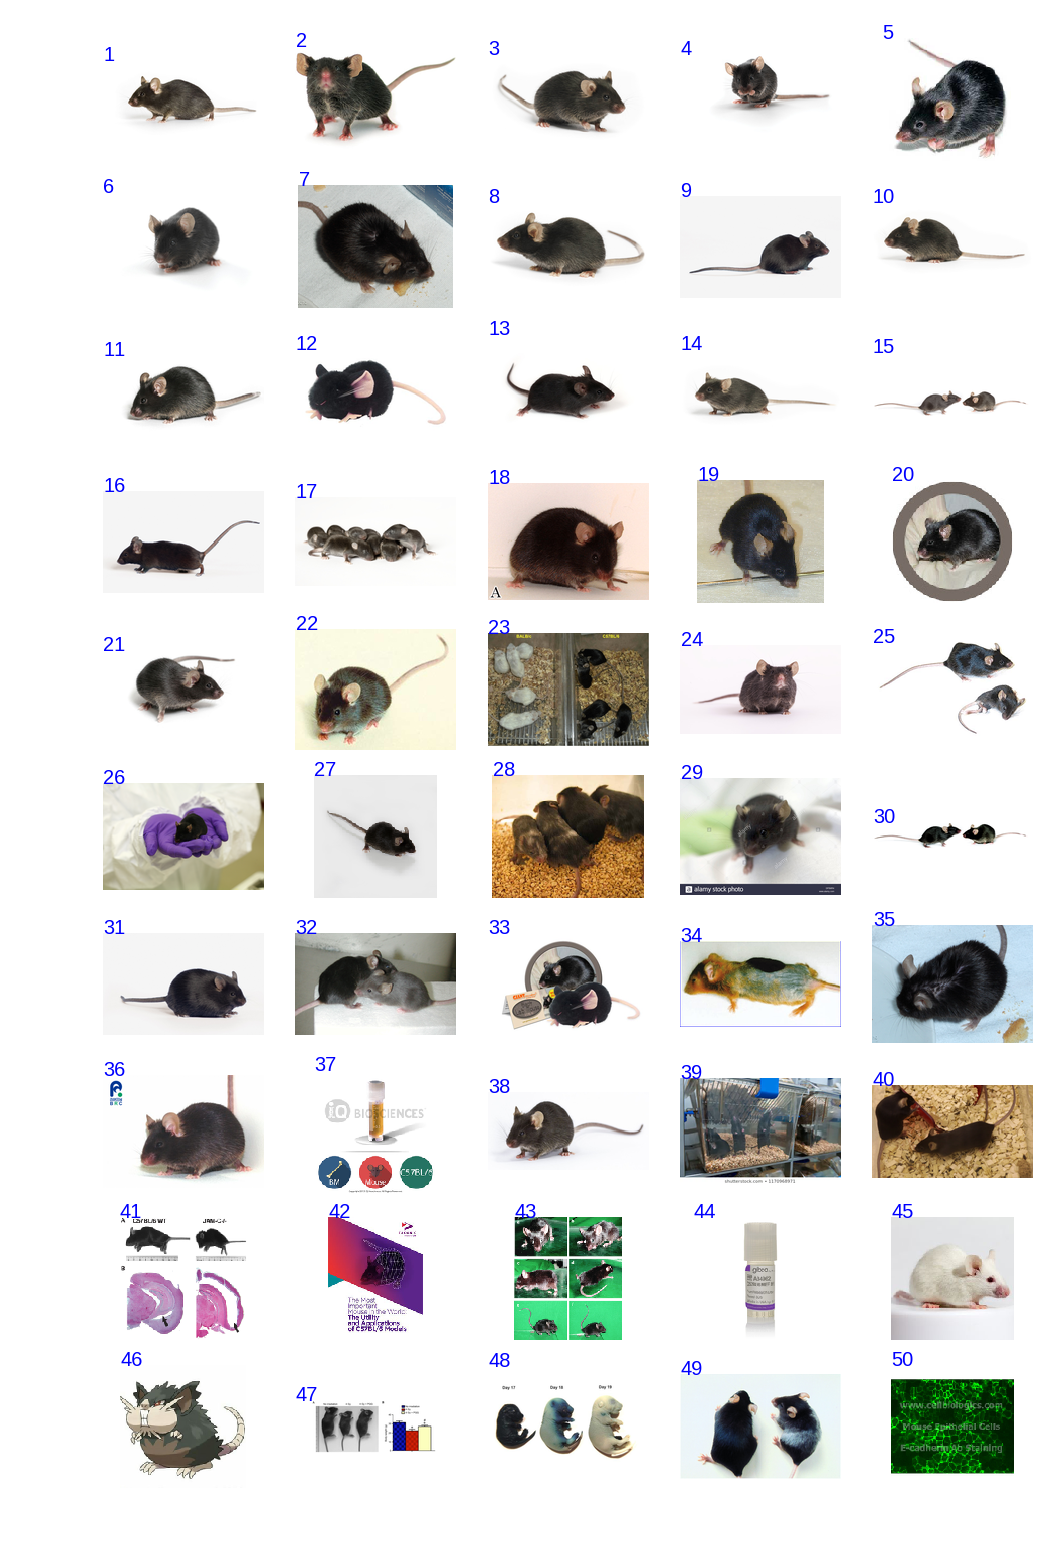

In [0]:
# (2-2-1)
# im1ディレクトリ中の画像を表示。
#
#   B6が映っていない画像を、手作業でリストアップ。
# 　
#
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

fig = plt.figure(figsize=(5,8),dpi=240)


ii=1
kk = 0
basewidth = 160
 
for x in range(1,51):
    tmpfile='im%d/0000%02d.jpg' % (ii, x)   
    kk += 1
    #------------------------------------
    ax1 = fig.add_subplot(10,5,kk)
    ax1.axis("off")
    ax1.text(0, 0, kk, fontsize=6, color='blue')
   
    tmpimg=Image.open(tmpfile,'r').convert('RGBA')
    wratio = (basewidth/float(tmpimg.size[0]))
    hsize = int((float(tmpimg.size[1])*float(wratio)))
    outimg = tmpimg.resize((basewidth,hsize), Image.ANTIALIAS)
    ax1.imshow(outimg)
      
plt.show()



In [0]:
#(2-2-2)
# im1の不要画像を削除
#
# rm(linuxの削除コマンド)
#
%%bash

list_clean=(37 44 45 46 48 50) #定型でも要変更

#------削除作業用のim1_cleanディレクトリ作成、JPG画像をコピーー---------------

if [ -e im1_clean ]; then
    rm -r im1_clean
fi
mkdir im1_clean
cp -r im1/*.jpg im1_clean

#------不要画像を手作業で消去-------------

for ii in ${list_clean[@]}; do
     filename=$(printf "im1_clean/0000%02d.jpg" $ii )
     rm  $filename
     echo " $filename --- deleted."
done


#-----フォルダ毎に、画像枚数をカウント---------------


echo "im1      # =" `ls -l im1/*.jpg |wc -l`
echo "im1_clean# =" `ls -l im1_clean/*.jpg |wc -l`



 im1_clean/000037.jpg --- deleted.
 im1_clean/000044.jpg --- deleted.
 im1_clean/000045.jpg --- deleted.
 im1_clean/000046.jpg --- deleted.
 im1_clean/000048.jpg --- deleted.
 im1_clean/000050.jpg --- deleted.
im1      # = 50
im1_clean# = 44


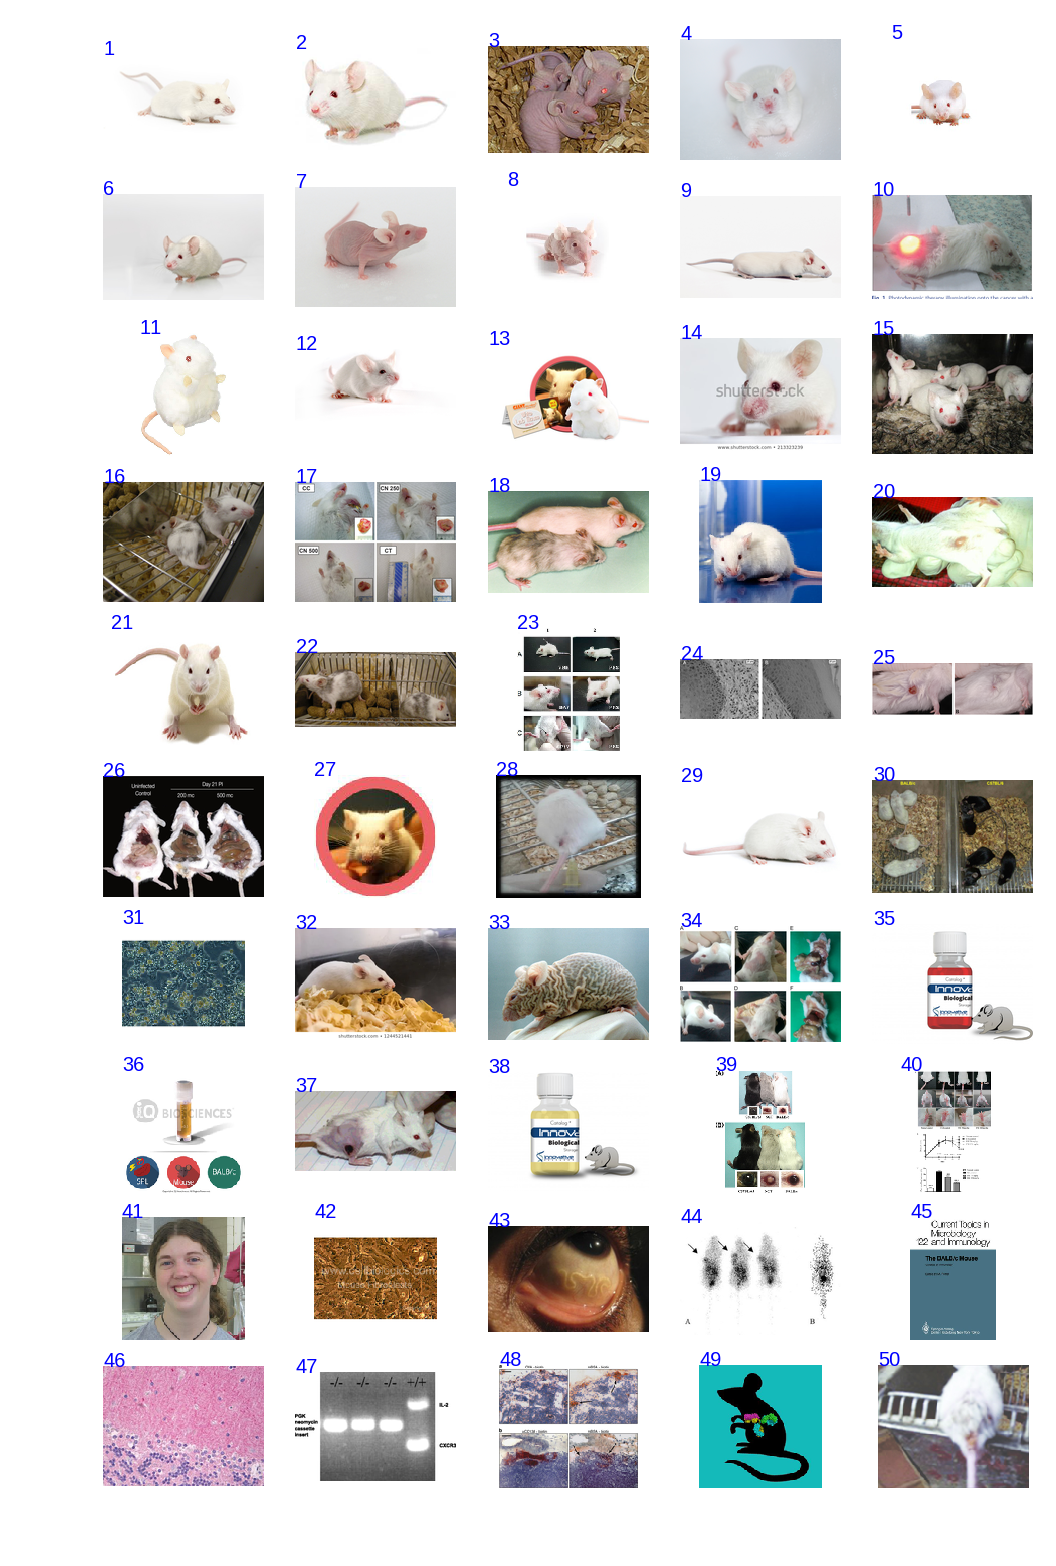

In [0]:
# (2-2-3)
# im2ディレクトリ中の画像を表示。
#
#   BALBが映っていない画像を、手作業でリストアップ。
# 　
#
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

fig = plt.figure(figsize=(5,8),dpi=240)


ii=2
kk = 0
basewidth = 160
 
for x in range(1,51):
    tmpfile='im%d/0000%02d.jpg' % (ii, x)   
    #print(tmpfile)
    kk += 1
    #------------------------------------
    #if os.path.exists(tmpfile):
    ax1 = fig.add_subplot(10,5,kk)
    ax1.axis("off")
    ax1.text(0, 0, kk, fontsize=6, color='blue')
   
    tmpimg=Image.open(tmpfile,'r').convert('RGBA')
    wratio = (basewidth/float(tmpimg.size[0]))
    hsize = int((float(tmpimg.size[1])*float(wratio)))
    outimg = tmpimg.resize((basewidth,hsize), Image.ANTIALIAS)
    ax1.imshow(outimg)
    #else:
    #  printf("not found")
      
plt.show()


In [0]:
#（2-2-4）
# im2の不要な画像を削除
#
#

%%bash

list_clean=(24 30 31 35 36 38 39 41 42 43 44 45 46 47 48 49) 

#-----削除作業用のim2_cleanディレクトリ作成、JPG画像をコピー---------------

if [ -e im2_clean ]; then
    rm -r im2_clean
fi
mkdir im2_clean
cp -r im2/*.jpg im2_clean

#------不要画像を手作業で削除-------------

for ii in ${list_clean[@]}; do
     filename=$(printf "im2_clean/0000%02d.jpg" $ii )
     rm  $filename
     echo " $filename --- deleted."
done


#-----フォルダ毎に、画像枚数をカウント---------------


echo "im2      # =" `ls -l im2/*.jpg |wc -l`
echo "im2_clean# =" `ls -l im2_clean/*.jpg |wc -l`



 im2_clean/000024.jpg --- deleted.
 im2_clean/000030.jpg --- deleted.
 im2_clean/000031.jpg --- deleted.
 im2_clean/000035.jpg --- deleted.
 im2_clean/000036.jpg --- deleted.
 im2_clean/000038.jpg --- deleted.
 im2_clean/000039.jpg --- deleted.
 im2_clean/000041.jpg --- deleted.
 im2_clean/000042.jpg --- deleted.
 im2_clean/000043.jpg --- deleted.
 im2_clean/000044.jpg --- deleted.
 im2_clean/000045.jpg --- deleted.
 im2_clean/000046.jpg --- deleted.
 im2_clean/000047.jpg --- deleted.
 im2_clean/000048.jpg --- deleted.
 im2_clean/000049.jpg --- deleted.
im2      # = 50
im2_clean# = 34


In [0]:
# (2-2-5)
# 
# im1_cleanとim2_clean下の.jpg画像の枚数をカウント
# img_number.txtに保存する。
#
%%bash
ls -l im1_clean/*.jpg |wc -l > img_number.txt
ls -l im2_clean/*.jpg |wc -l >> img_number.txt

cat img_number.txt


44
34


----

B6系統 (im1_clean/*.jpg)とBALB系統(im2_clean/*.jpg)で画像枚数が少ない方を、
機械学習モデルの学習に使用する。

im1_cleanとim2_cleanのディレクトリで、画像枚数が少ない方を機械学習モデルの学習データ数「N」とする。

----






In [0]:
# (2-2-6) 
#
# データ数 Nを計算
# img_number.txt数値から、pythonのmin関数でNを計算。N.txtにNを保存。
#

with open("img_number.txt") as f1:
  minval =  min(f1)
  print("Number of Selected Images : N = %s " % minval)
  
  
with open("N.txt", "w") as f2:
  f2.write(minval)  

Number of Selected Images : N = 34
 


## (2-3)  Train/Testディレクトリに画像分配


モデル学習用の入力データを設置する、Train / Test ディレクトリを作成する。各ディレクトリには、im1_cleanとim2_cleanの画像を分配する。全体の画像枚数が少ないので、Testディレクトリには10枚のみ割り当てる。


| 画像枚数 | 用途 | ディレクトリ |
|:-----------|------------:|:------------:|
|  N  | 全画像枚数 | im1_clean  ,    im2_clean |
| 10 | Test用の画像枚数 |  Test　|
| N - 10 | Train用の画像枚数| Train  |



In [0]:
# (2-3-1) Train/Testに画像をcopy
#
#
import os
import shutil
import glob


#----データ数 Nを読み込み-------------

with open("N.txt") as ff:
  N =  int(ff.read())
  print("N=%d" % N)

#----前使ったディレクトリが存在すれば、中身も全て削除-------------

if os.path.exists("./Train"):
  shutil.rmtree("./Train")

if os.path.exists("./Test"):
  shutil.rmtree("./Test")
  
#----新規にディレクトリ作成-----------------------------------
os.mkdir("./Train")
os.mkdir("./Test")
os.mkdir("./Train/im1")
os.mkdir("./Train/im2")
os.mkdir("./Test/im1")
os.mkdir("./Test/im2")

#----ランダムに10件の番号生成--------------------------------------------------

import random
hit = random.sample(range(1,N), 10)
print(hit)

#----新規ファイル名でTest/Trainにコピー（im1_clean,im2_clean）---------------

 
for ii in range(1, 3):
    
  files = sorted(glob.glob("./im%d_clean/*.jpg" % ii))

  kk=1
  for tmpfile in files:      
    out="im%d_%03d.jpg" % (ii, kk)
    print("[kk=%d: %s]=>[%s]" % (kk, tmpfile,out))
    if kk in  hit :
      print('TE--%s' % out)    
      if ii == 1:
        shutil.copyfile(tmpfile, "Test/im1/%s" % out )
      else:
        shutil.copyfile(tmpfile, "Test/im2/%s" % out )
    elif kk<=N :  
      print('TR**%s' % out)
      if ii == 1:
        shutil.copyfile(tmpfile, "Train/im1/%s" % out )
      else:
        shutil.copyfile(tmpfile, "Train/im2/%s" % out )
    kk=kk+1
  
  

N=34
[24, 26, 2, 9, 32, 22, 33, 13, 8, 25]
[kk=1: ./im1_clean/000001.jpg]=>[im1_001.jpg]
TR**im1_001.jpg
[kk=2: ./im1_clean/000002.jpg]=>[im1_002.jpg]
TE--im1_002.jpg
[kk=3: ./im1_clean/000003.jpg]=>[im1_003.jpg]
TR**im1_003.jpg
[kk=4: ./im1_clean/000004.jpg]=>[im1_004.jpg]
TR**im1_004.jpg
[kk=5: ./im1_clean/000005.jpg]=>[im1_005.jpg]
TR**im1_005.jpg
[kk=6: ./im1_clean/000006.jpg]=>[im1_006.jpg]
TR**im1_006.jpg
[kk=7: ./im1_clean/000007.jpg]=>[im1_007.jpg]
TR**im1_007.jpg
[kk=8: ./im1_clean/000008.jpg]=>[im1_008.jpg]
TE--im1_008.jpg
[kk=9: ./im1_clean/000009.jpg]=>[im1_009.jpg]
TE--im1_009.jpg
[kk=10: ./im1_clean/000010.jpg]=>[im1_010.jpg]
TR**im1_010.jpg
[kk=11: ./im1_clean/000011.jpg]=>[im1_011.jpg]
TR**im1_011.jpg
[kk=12: ./im1_clean/000012.jpg]=>[im1_012.jpg]
TR**im1_012.jpg
[kk=13: ./im1_clean/000013.jpg]=>[im1_013.jpg]
TE--im1_013.jpg
[kk=14: ./im1_clean/000014.jpg]=>[im1_014.jpg]
TR**im1_014.jpg
[kk=15: ./im1_clean/000015.jpg]=>[im1_015.jpg]
TR**im1_015.jpg
[kk=16: ./im1_clean/0

In [0]:
# (2-3-2) Train/Testの画像数を確認
#
#　数が0の場合はエラー
#
%%bash

echo "Test/im1/#=" `ls -l Test/im1/*.jpg |wc -l `
echo "Test/im2/#=" `ls -l Test/im2/*.jpg |wc -l `
echo "Train/im1#=" ` ls -l Train/im1/*.jpg |wc -l`
echo "Train/im2#=" ` ls -l Train/im2/*.jpg |wc -l`
#ls -l Test/*.jpg
#ls -l Train/*.jpg


Test/im1/#= 10
Test/im2/#= 10
Train/im1#= 24
Train/im2#= 24


-----
-----

##(3)機械学習モデルの構築と精度評価

第3部では、深層学習を用いた画像分類モデルを構築してみよう。モデルは、画像分類用の深層学習のConvolutional Neural Network(CNN)を用いる。B6系統とBALB系統を画像で見分ける為の学習データは、**１分類クラスあたりの画像枚数は30枚強**と非常に少ない。学習データが少ない場合は、ImageNetデータベースを学習したkerasフレームワークの訓練済み深層学習モデルを利用する。


＜注意＞

- [ ImageNet](http://image-net.org/synset?wnid=n02330245)は機械学習分野で利用される画像注釈データセットである。データベースは、約1400万枚の画像と2.1万の分類クラスで構成されている。単純計算で**ImageNetの1分類クラスの画像枚数は700枚**になる。
- 本定型コードの**分類クラス数は2、画像枚数は30枚強**とImageNetデータベースに比べて<font color="red">1クラスあたりの画像枚数が少ない</font>事に注意。





## 3-1 ImageNet学習済の深層学習モデルで画像分類

オリジナルのImageNetの分類ラベルでは、「C57BL/6」と「BALB/c」のラベルは無いので、試しに、ImageNetモデルそのままでB6画像を分類してみよう。Kerasライブラリの[ImageNet学習済の深層学習モデル](https://keras.io/ja/applications/#imagenet)の中から、層数が少なく理解し易い英Oxford University製「VGG16」深層学習モデルを使う。
ImageNet学習済モデルで、B6画像(im1/000001.jpg)の分類ラベルを予測すれば、「wood_rabbit」「hamster」などが出力されるだろう。

--------

<参考情報>


- ①Kerasは深層学習ライブラリの1つ

     Kerasは、Tensorflow, Pytorch等の深層学習ツールをbackendとするラッパープログラム。モデルの記述が簡便にできる（＝プログラミングが容易になる）ので人気がある。
     

------

- ① KerasのImageNet学習済モデルのリスト

     ![KerasModels](https://lh4.googleusercontent.com/F-RPZ3z289qd5XODid-rIL3KaEIZRINyqnmqyewql_8AQewdo7g5ddeNH9kkTKKsoLjS2rbisNWA7J-SjEzS=w1677-h1020-rw =480x "KerasModels" )  引用：https://keras.io/ja/applications/#imagenet




------


- ②VGG16モデルとは

     画像分類タスクでは、深層学習モデルの中でConvolutional Neural Network(CNN)が一般的に使われる。CNNモデルは、2012年にカナダのHinton博士がImageNet画像分類コンペILSVRCに優勝して広まったニューラルネットワーク構造である。Hinton博士の優勝モデルはAlexNetと呼ばれている。8層しかないAlexNetは現在では精度が低いモデルの為に、Kerasでは削除されてしまい使えない。[VGG16モデル](http://www.robots.ox.ac.uk/~vgg/research/very_deep/)は、2014年のILSVRCコンペで発表された英Oxford University製のCNNモデルである。16層（層数が少なめ）と理解し易いネットワーク構造が特徴である。AlexNetが削除されている現在、VGG16は教育分野で入門モデルとして使われている。本定型プログラムもVGGG16モデルを使う。

   ![VGG16 Model](https://heuritech.files.wordpress.com/2016/02/vgg16.png  =640x "Inception" )
  　[画像引用元](https://blog.heuritech.com/2016/02/29/a-brief-report-of-the-heuritech-deep-learning-meetup-5/)




In [0]:
# (3-1-1)
# ImageNet学習済の深層学習モデルのダウンロード
#　構造はVGG16を選択。

from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(weights='imagenet')

Using TensorFlow backend.


553467904/553467096 [==============================] - 7s 0us/step


Predicted :
40960/35363 [==================================] - 0s 1us/step
[ Probability Score : 0.8220 ],[ Predicted Label : hamster ]
[ Probability Score : 0.0546 ],[ Predicted Label : mousetrap ]
[ Probability Score : 0.0173 ],[ Predicted Label : guinea_pig ]
[ Probability Score : 0.0143 ],[ Predicted Label : corn ]
[ Probability Score : 0.0116 ],[ Predicted Label : fox_squirrel ]


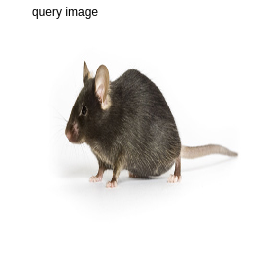

In [0]:
# (3-1-2)
# ImageNet学習済の深層学習モデルで画像分類
# query画像は、im1/000001.jpg
#



from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import os

ROWS=224
COLS=224


# B6画像(000001.jpg)を入力
img_path = 'im1_clean/000001.jpg'
img = image.load_img(img_path, target_size=(ROWS, COLS))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 推論実行
preds = vgg16_model.predict(x)

# 推論結果を出力
print('Predicted :')
for p in decode_predictions(preds, top=5)[0]:
    print("[ Probability Score : {:.4f} ],[ Predicted Label : {} ]".format(p[2], p[1]))
    
# 入力画像視覚化    
plt.axis("off")
plt.text(0, 0, "query image", fontsize=12, color='black')
plt.imshow(img)      
plt.show()

上の予測結果では、「hamster」などの分類ラベルが出力されている。

## 3-2 ImageNet学習済の深層学習モデルを使って転移学習

「C57BL/6」「BALB/c」の2つの画像分類ラベルの予測モデルを、ここでは新規に構築する（※ImageNet学習セットには、両方の分類ラベルとも含まれていない事に注意）。

深層学習モデルの構築方法には、次の2種類のアプローチがある。

-  Scratchからの学習(Build from Scratch)
-  転移学習(Transfer Learning)

「Scratchからの学習」とは、モデルを最初から学習するアプローチである。転移学習とは、別データでの学習済モデルを使うアプローチである。ImageNet学習済モデルを使った画像分類タスクに限ると、Scratch学習より転移学習の方が精度が高くなる事が、論文で報告されている。本定型プログラムでは、ImageNet学習済モデルを起点に転移学習をする事で、「C57BL/6」と「BALB/c」を分類する新モデルを構築する。

-------

＜参考＞

- [Kerasで学ぶ転移学習](https://elix-tech.github.io/ja/2016/06/22/transfer-learning-ja.html#transfer)
- [Qiita: 転移学習とは何か調べてみた](https://qiita.com/ANNEX_IBS/items/55c7a8984fe88a756965)
- [Fine-tune InceptionV3 on a new set of classes](https://keras.io/ja/applications/#fine-tune-inceptionv3-on-a-new-set-of-classes)


- [Transfer Learning Process](https://towardsdatascience.com/transfer-learning-from-pre-trained-models-f2393f124751#8d7d) ![FrozenLevel](https://cdn-images-1.medium.com/max/900/1*7ZD-u-h8hFPuN2PYJvLMBw.png =460x "FrozenLevel")

　転移学習は、モデルをどこまで学習しなおすかで、幾つかの段階に分類できる（上図）。上図では、学習データセットのサイズと、データセット間の類似度により、転移学習をする範囲が青色に塗られている。ImageNetデータベースには、マウス画像も多数含まれているので、ImageNetデータとラボマウスデータ間の「Dataset Similarity」は高いと考えられる。しかしダウンロードした画像データの枚数は少ないので、Dataset Sizeは小さい。この為、転移学習で学習しなおす範囲は、図右下相当(Freeze the convolutional base)とする。
 
 - [少ない画像から画像分類を学習させる方法（kerasで転移学習：fine tuning）](https://spjai.com/keras-fine-tuning/)

In [0]:
# (3-2-1)
# ImageNet学習済のVGG16モデルの読み込み
# 全結合層を含めない(include_top=False)ところが、(3-1-1)と異なる。
#

from keras.applications import VGG16


ROWS=224
COLS=224

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(ROWS, COLS, 3))



58892288/58889256 [==============================] - 1s 0us/step


In [0]:
# (3-2-2)
#
#　全結合層を新規に作成して、ImageNet学習済モデル(3-2-1:base_model)に追加
#  全結合層以外をFreeze(学習できない様にする)
#
import os.path,sys

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input


N_CATEGORIES  = 2
BATCH_SIZE = 10
ROWS=224
COLS=224

# base_modelに追加する形で、全結合層を作成  
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(N_CATEGORIES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# 全結合層を除く、全ての層をFreeze  
for layer in base_model.layers:
  layer.trainable = False
  print(layer, layer.trainable)

# optimizerや評価尺度等の指定と、モデル構造の視覚化    
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()



<keras.engine.input_layer.InputLayer object at 0x7f0040921c50> False
<keras.layers.convolutional.Conv2D object at 0x7f0040921fd0> False
<keras.layers.convolutional.Conv2D object at 0x7f0040921f98> False
<keras.layers.pooling.MaxPooling2D object at 0x7f00409325c0> False
<keras.layers.convolutional.Conv2D object at 0x7f0040932860> False
<keras.layers.convolutional.Conv2D object at 0x7f00400c4518> False
<keras.layers.pooling.MaxPooling2D object at 0x7f0040087518> False
<keras.layers.convolutional.Conv2D object at 0x7f00400f4128> False
<keras.layers.convolutional.Conv2D object at 0x7f004003f0b8> False
<keras.layers.convolutional.Conv2D object at 0x7f002ffd63c8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f002ffeb320> False
<keras.layers.convolutional.Conv2D object at 0x7f002ffebf60> False
<keras.layers.convolutional.Conv2D object at 0x7f002ffa2160> False
<keras.layers.convolutional.Conv2D object at 0x7f002ffba438> False
<keras.layers.pooling.MaxPooling2D object at 0x7f002ff50e48>

In [0]:
# (3-2-3)　
# 画像枚数を水増し、モデルを学習
#
# - ImageDataGeneratorで画像枚数を水増し
# - モデルを学習
#
from keras.preprocessing.image import ImageDataGenerator
import keras.callbacks

N_TRAINING = 62
N_VALIDATION = 20
N_EPOCH = 50



#-------画像データ水増し -------------------

train_datagen = ImageDataGenerator(
   rescale=1.0 / 255, 
   shear_range=0.2, #ランダムにシアー変換
   zoom_range=0.2, #ランダムにズーム
   horizontal_flip=True, #ランダムに水平方向反転
   rotation_range=10)  #ランダムに回転

test_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
)

#-------入力ディレクトリ指定、画像リサイズ----------------
train_generator = train_datagen.flow_from_directory(
   './Train',
   target_size=(ROWS, COLS),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)

validation_generator = test_datagen.flow_from_directory(
   './Test',
   target_size=(ROWS, COLS),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)

#-------モデルの学習----------------

hist = model.fit_generator(train_generator,
   steps_per_epoch=N_TRAINING//BATCH_SIZE,
   epochs=N_EPOCH,
   verbose=1,
   validation_data=validation_generator,
   validation_steps=N_VALIDATION//BATCH_SIZE,
   )


#-------モデルの保存----------------

model.save('tmpmodel.hdf5')

Found 48 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/50
6/6 [==============================] - 5s 754ms/step - loss: 0.7043 - acc: 0.4127 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/50
6/6 [==============================] - 1s 178ms/step - loss: 0.7109 - acc: 0.4294 - val_loss: 0.6906 - val_acc: 0.4000
Epoch 3/50
6/6 [==============================] - 2s 303ms/step - loss: 0.6980 - acc: 0.4833 - val_loss: 0.6878 - val_acc: 0.5500
Epoch 4/50
6/6 [==============================] - 2s 304ms/step - loss: 0.6971 - acc: 0.4797 - val_loss: 0.6857 - val_acc: 0.5000
Epoch 5/50
6/6 [==============================] - 2s 288ms/step - loss: 0.7025 - acc: 0.4531 - val_loss: 0.6831 - val_acc: 0.5500
Epoch 6/50
6/6 [==============================] - 2s 300ms/step - loss: 0.6943 - acc: 0.4594 - val_loss: 0.6808 - val_acc: 0.5000
Epoch 7/50
6/6 [==============================] - 2s 290ms/step - loss: 0.6920 - acc: 0.5071 - val_loss: 0.6781 - val_acc: 0.5000
Epoch 8/50

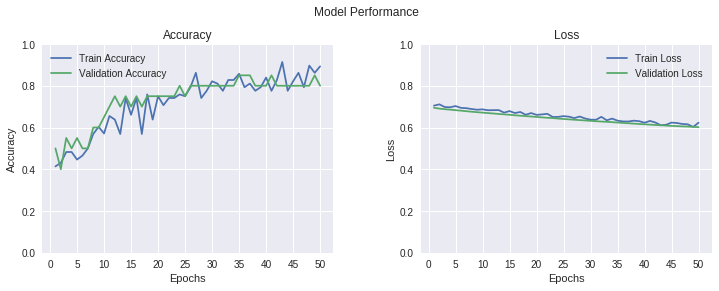

In [0]:
# (3-2-4)　
#  学習過程の可視化
#　Epoch毎の精度(Accuracy)を視覚化
#
import matplotlib.pyplot as plt
%matplotlib inline 

N_EPOCH=50

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,N_EPOCH + 1))
ax1.plot(epoch_list, hist.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, hist.history['val_acc'], label='Validation Accuracy')
ax1.set_ylim([0,1.0])
ax1.set_xticks(np.arange(0, N_EPOCH + 1, 5))
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, hist.history['loss'], label='Train Loss')
ax2.plot(epoch_list, hist.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, N_EPOCH + 1, 5))
ax2.set_ylim([0,1.0])
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [0]:
#
# (3-2-5)
# 構築モデルの精度評価
# B6(im1)とBALB(im2)の画像分類精度(評価尺度はAccuracy)を計算
# 
#
scores = model.evaluate_generator(validation_generator,N_TRAINING//BATCH_SIZE)

print(train_generator.class_indices)
print('Test accuracy(画像分類精度)={1:.2f} (Test loss={0:.2f})'.format(*scores))
#print('Test accuracy: %.2f' % scores[1])
#print('Test loss: %.2f' % scores[0])

{'im1': 0, 'im2': 1}
Test accuracy(画像分類精度)=0.80 (Test loss=0.60)
